## Libraries and Pre-trained Models

In [1]:
import cv2
import matplotlib.pyplot as plt

The **Viola-Jones algorithm** is a widely used object detection framework, best known for its real-time face detection capabilities. Introduced by Paul Viola and Michael Jones in 2001, the algorithm revolutionized computer vision by enabling fast and accurate object detection, even on low-performance hardware. Its key components include Haar-like features, an integral image for rapid feature computation, the AdaBoost algorithm for selecting the most effective features, and a cascade classifier that quickly eliminates unlikely face regions.

What makes Viola-Jones particularly powerful is its efficiency in detecting objects in real time. Instead of processing the entire image exhaustively, the algorithm focuses computation on the most promising regions, using a cascade of increasingly complex classifiers. This design allows it to reject non-object regions quickly, conserving computational resources. While modern deep learning techniques have largely surpassed it in accuracy and versatility, Viola-Jones remains a foundational method in computer vision and is still used in resource-constrained applications.

In [7]:
face_cascade = cv2.CascadeClassifier()
face_cascade.load('haarcascade_frontalface_alt.xml')

eyes_cascade = cv2.CascadeClassifier()
eyes_cascade.load('haarcascade_eye.xml')

True

## Face and Eye Detection

Text(0.5, 1.0, 'John and Sherlock Faces')

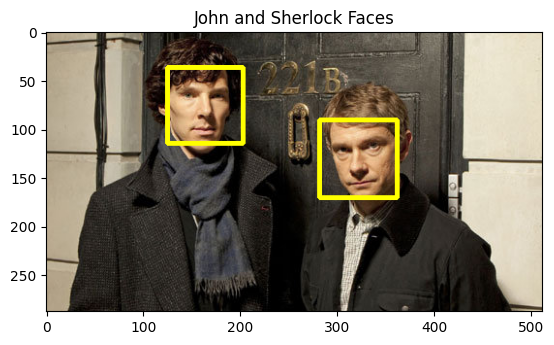

In [8]:
image = cv2.imread('images/sherlock_john.jpg')
#per processing (for better vision and faster processing)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

faces = face_cascade.detectMultiScale(gray) #Invoke multi scale detection over sherlock and john image

for (x,y,w,h) in faces:
    cv2.rectangle(
        img= image, 
        pt1=(x,y), 
        pt2=(x+w,y+h), 
        color=(0,255,255), 
        thickness=3)

plt.imshow(image[...,::-1]); plt.title("John and Sherlock Faces")

Text(0.5, 1.0, 'Michael-Corleone with their eyes')

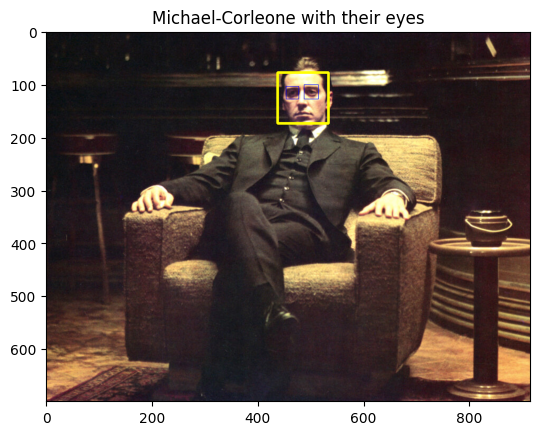

In [10]:
image = cv2.imread('images/the-godfather-leaned-back-michael-corleone.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

faces = face_cascade.detectMultiScale(gray)

for (x,y,w,h) in faces:
    cv2.rectangle(
        img= image, 
        pt1=(x,y), 
        pt2=(x+w,y+h), 
        color=(0,255,255), 
        thickness=3)
    
    #we already know the faces, lets take a look inside their boxes for eyes!
    roi_gray = gray[y:y+h, x:x+w]
    #know lets take a look at face and find eyes(efficient computational process"removed background")
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(
        img= image, 
        pt1=(x+ex,y+ey), 
        pt2=(x+ex+ew,y+ey+eh), 
        color=(255,0,0), 
        thickness=1)
    
plt.imshow(image[...,::-1]); plt.title("Michael-Corleone with their eyes")